# Heat Pump Example


How to calculate a heat pump with carbatpy.
There are two storages (cold and hot) running between prescribed temperatures with defined fluids.

In [17]:
import carbatpy as cb

## Select the input file (yaml or json works):

In [18]:
DEFAULT_DIR =  cb.CB_DEFAULTS["General"]["CB_DIR"]+"\\data\\"
DEFAULT_FILE = DEFAULT_DIR+"hp-input-dictvariables"

The content of the (here: json) file is shown below.
It includes the wanted minimum separation between fluid temperatures D_T_MIN, superheating before compressor, isentropic efficiency (=const. at the moment), the pressures, fluids and their composition in both storages and the working fluid. If **P_Working["setting"] =="auto"** , the pressures will be determined acording to the storage temperatures, but this can fail.
Alternatively "setting" can be anything else, then the two pressures (p_low for the evaporator, p_high for the condenser, all in *Pa*) will be used together with the temperatures (and T-differences) listed. Again, if the values are not chosen properly, this will fail, therefore check the *warning* (see below).




    {
        "D_T_MIN": 4.0,
        "D_T_SUPER": 5,
        "ETA_S_C": 0.7,
        "P_IN_STORAGE_COLD": 500000.0,
        "P_IN_STORAGE_HOT": 500000.0,
        "P_WORKING": {
            "optimize": "None",
            "setting": "auto",
            "p_low": 0.0,
            "p_high": 0.0
        },
        "Q_DOT_MIN": 1000.0,
        "T_IN_STORAGE_COLD": 288.15,
        "T_IN_STORAGE_HOT": 288.15,
        "T_OUT_STORAGE_COLD": 250.15,
        "T_OUT_STORAGE_HOT": 363.0,
        "fluids_all": {
            "WORKING": [
                "Propane * Butane * Pentane * Hexane",
                [
                    0.75,
                    0.05,
                    0.15,
                    0.05
                ]
            ],
            "STORAGE_HOT": [
                "Water",
                [
                    1.0
                ]
            ],
            "STORAGE_COLD": [
                "Methanol",
                [
                    1.0
                ]
            ]
        }
    }

## Read the inputs from the file and create an input dictionary:

In [19]:
inputs = cb.hp_simple.HpVal.load_from_file(DEFAULT_FILE+".json")
# print(DEFAULT_FILE)

INPUTS = inputs.to_dict()

## Create a new instance of HeatPump with the wanted data:

In [20]:
hpn = cb.hp_simple.HeatPump( INPUTS)
print(hpn.evaluation)

{'Q_DOT_MIN': 1000.0, 'Power': 0.0, 'T_OUT_STORAGE_HOT': 363.0, 'T_OUT_STORAGE_COLD': 250.15, 'exergy_loss_rate': 0}


**Calculate the cop** and further values of the heat pump and plot it:

Start:

Propane * Butane * Pentane * Hexane, composition: [0.771733787, 0.0222759488, 0.178685867, 0.027304397199999997]
Temperature    : 284.15
Pressure    : 103162.80738655275
spec_Enthalpy    : 515638.559622378
spec_Volume    : 0.4413119378111834
spec_Entropy    : 2324.4430369865
quality_mass    : -9999990.0
spec_internal_Energy    : 470111.5811845765
x    : None
y    : None
z    : array('d', [0.771733787, 0.0222759488, 0.178685867, 0.027304397199999997])
After compressor

Propane * Butane * Pentane * Hexane, composition: [0.771733787, 0.0222759488, 0.178685867, 0.027304397199999997]
Temperature    : 402.2488899394503
Pressure    : 1587011.8598801694
spec_Enthalpy    : 709434.0144803056
spec_Volume    : 0.03591669528516554
spec_Entropy    : 2473.6676586767635
quality_mass    : -9999990.0
spec_internal_Energy    : 652433.7930950456
x    : None
y    : None
z    : array('d', [0.771733787, 0.0222759488, 0.178685867, 0.027304397199999997])
after heat exchanger: condenser

Propane * Butan

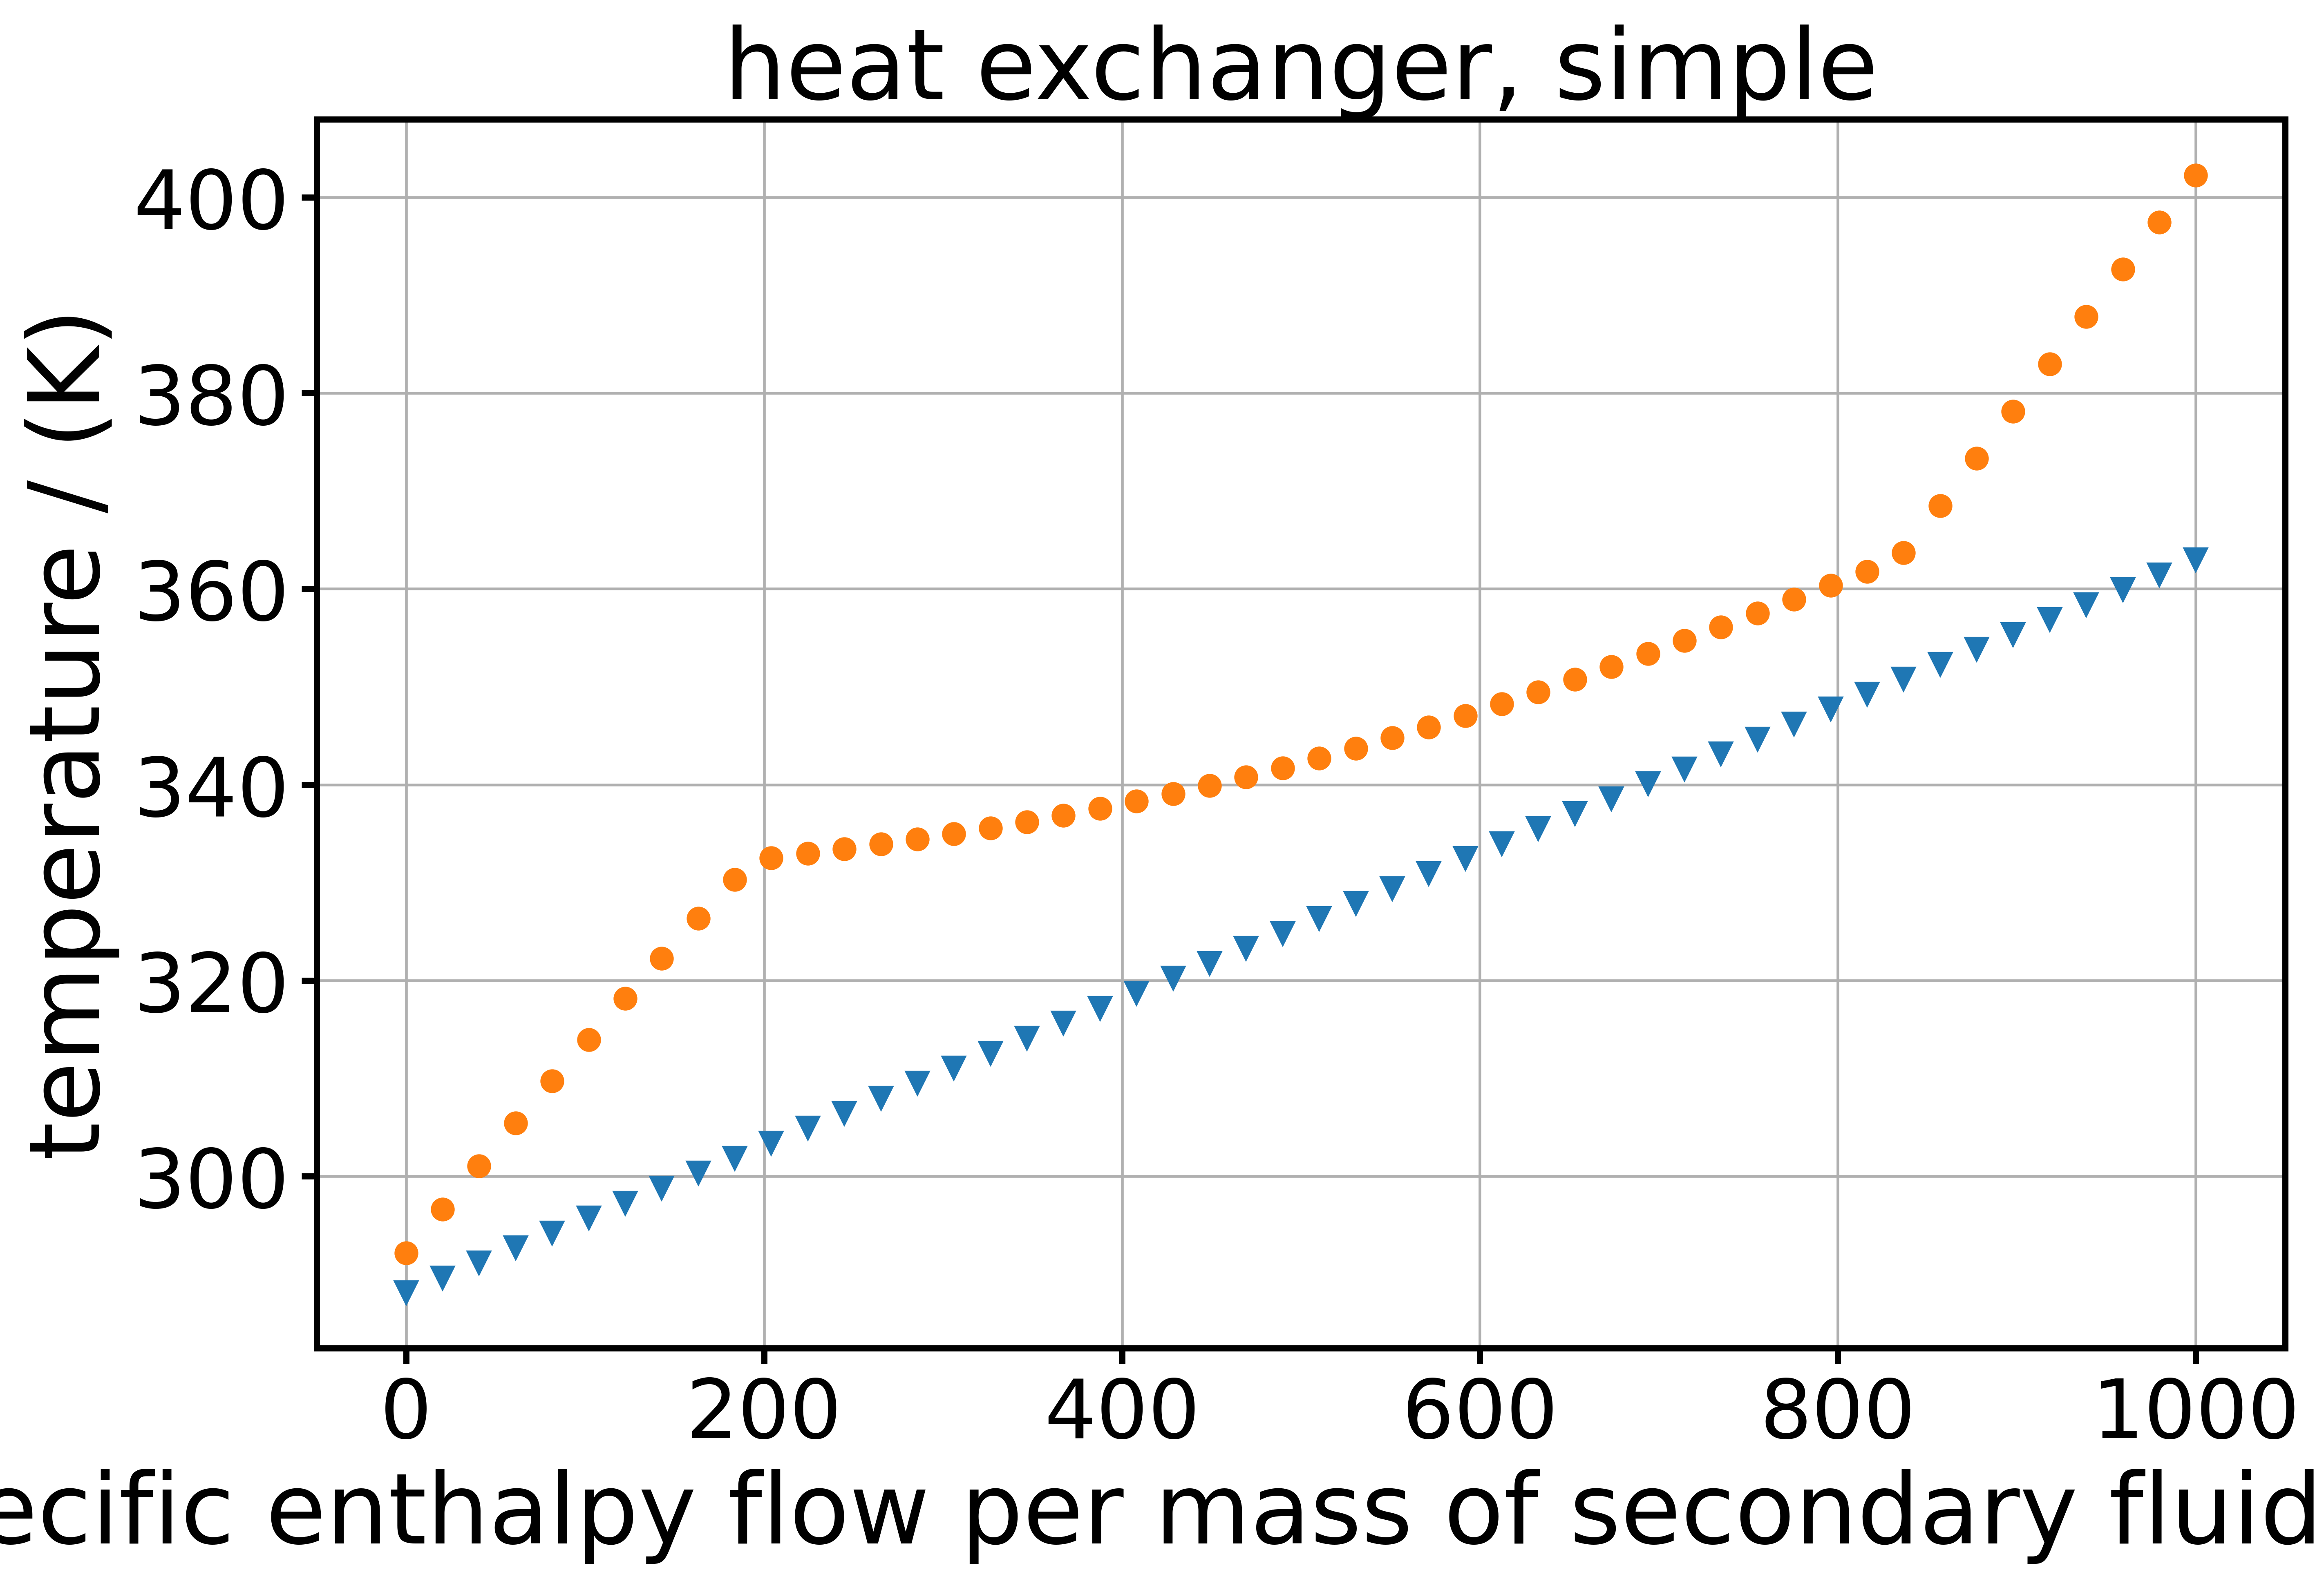

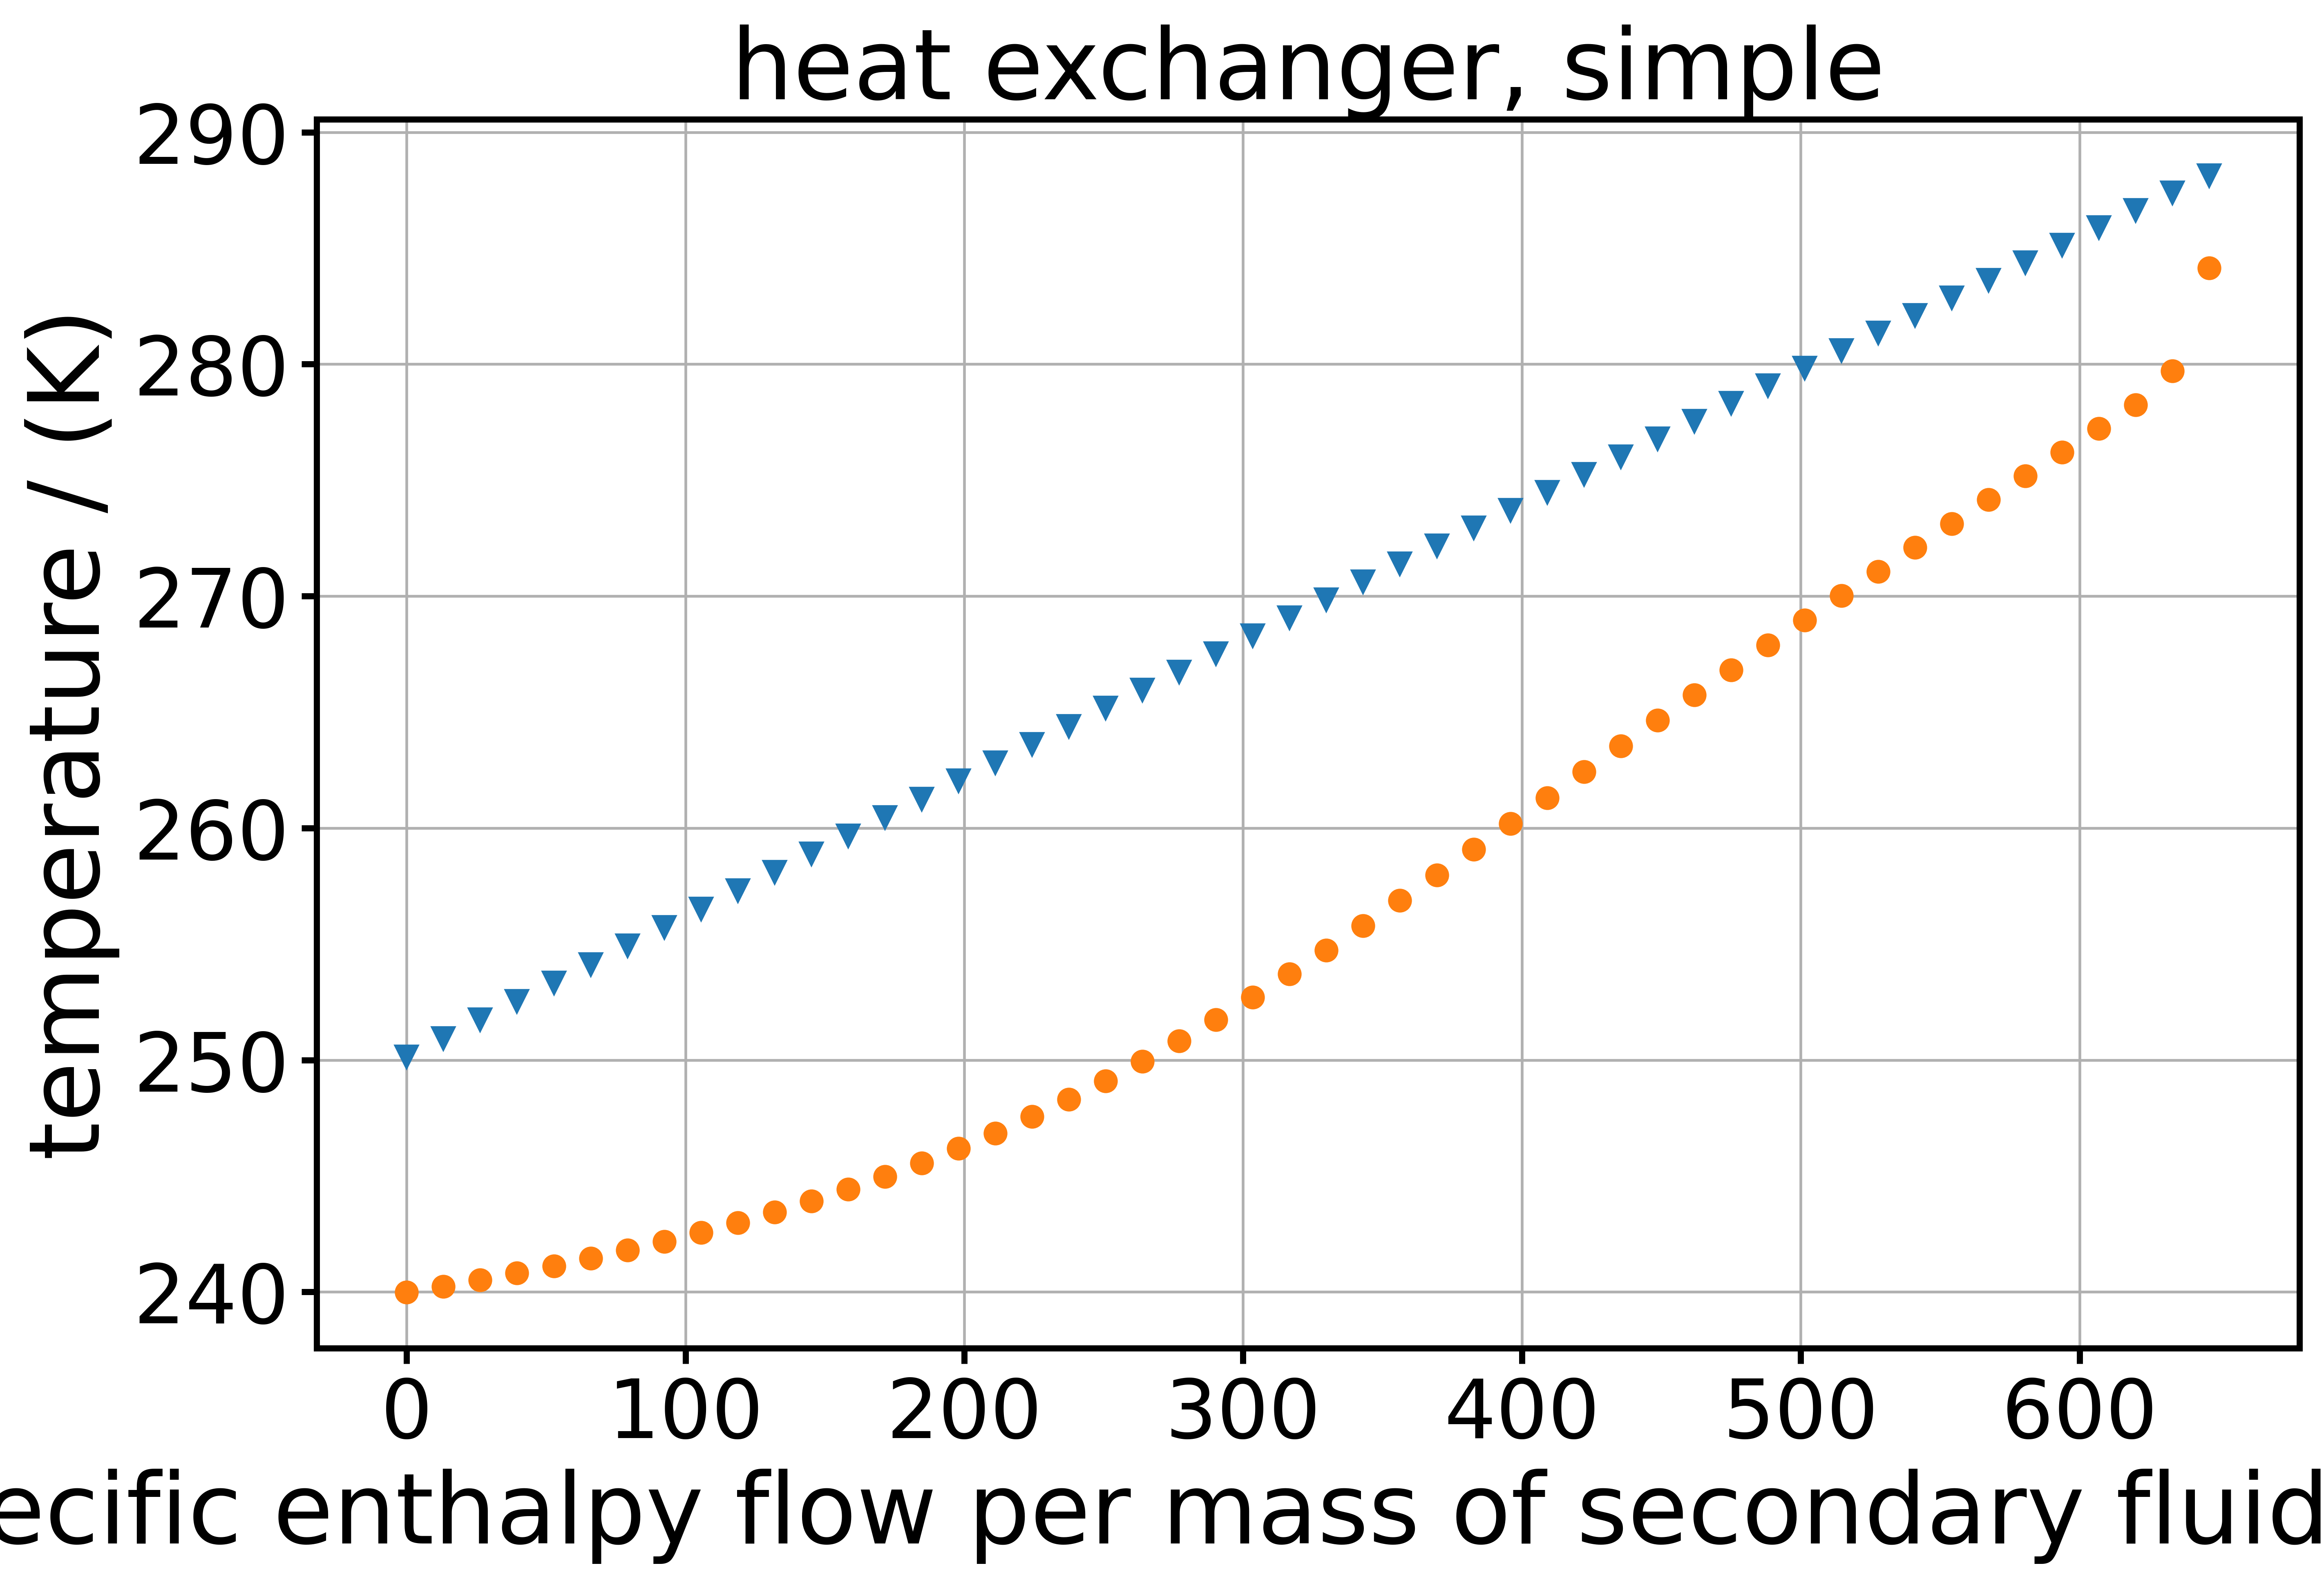

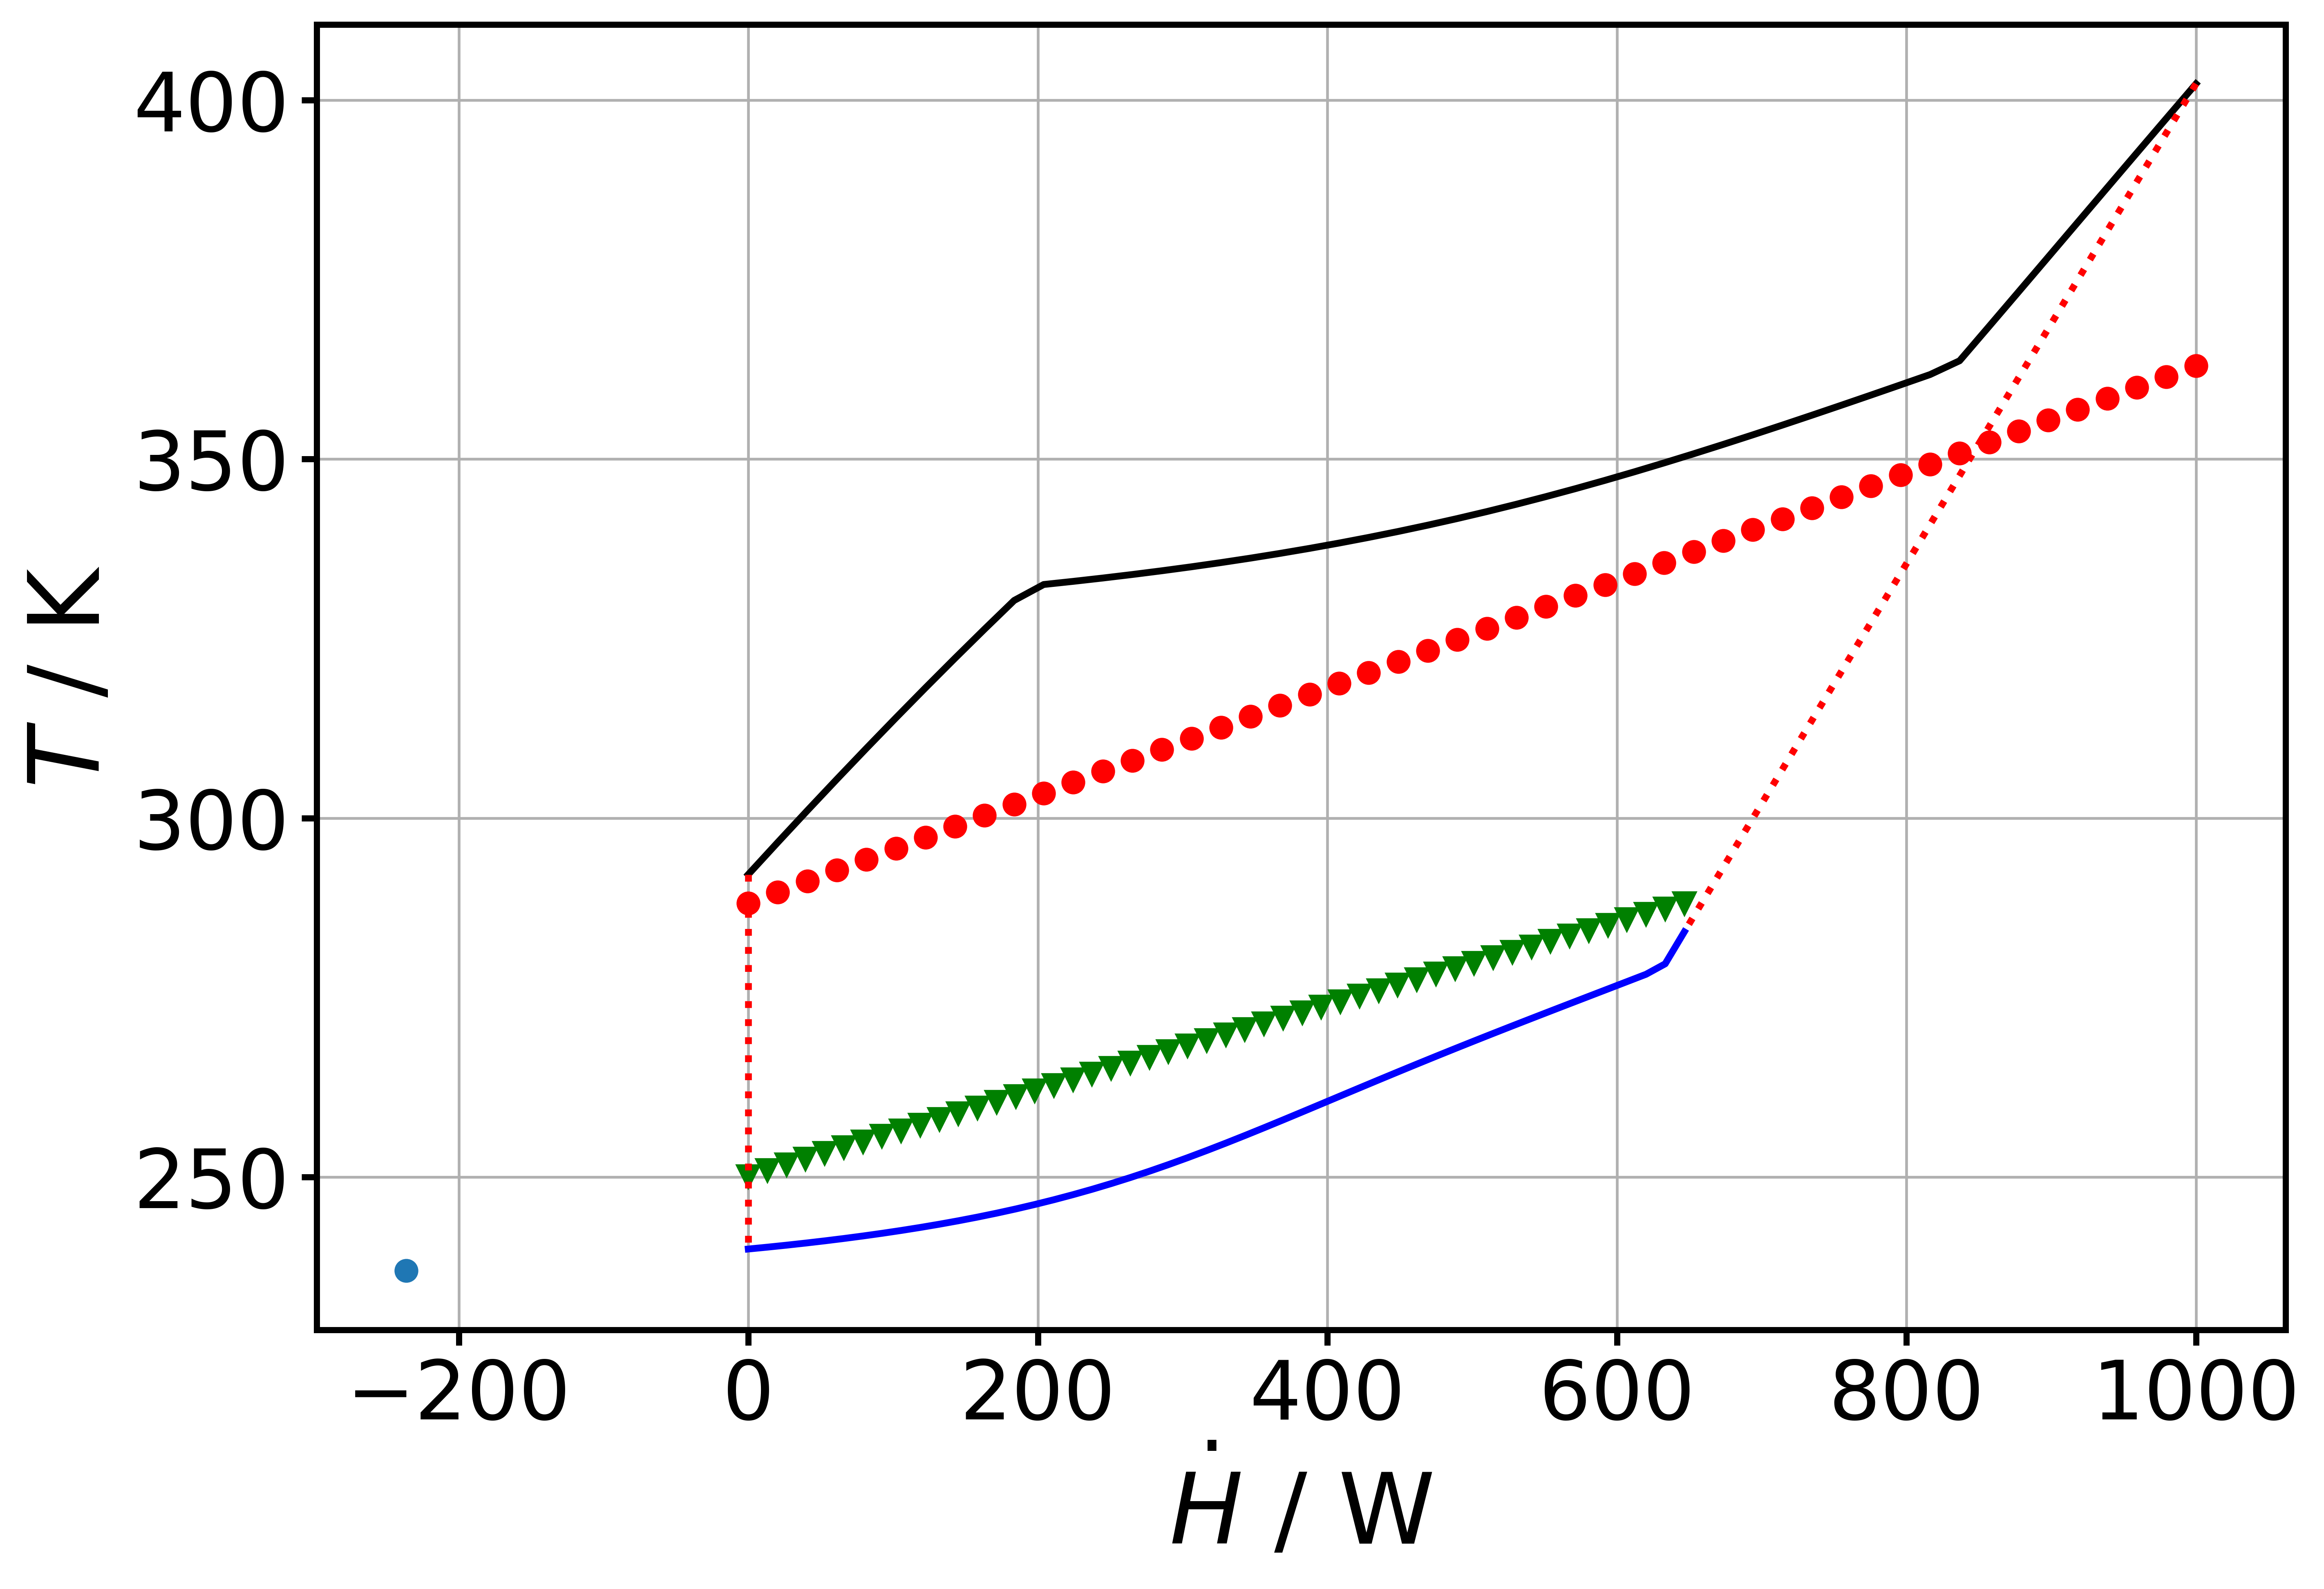

In [21]:
cop_n = hpn.calc_heat_pump(verbose=True)
hpn.hp_plot()
print(f"COP: {cop_n:.3f}")

## Get the results
Further **Evaluation results** are found here:

In [22]:
hpn.evaluation

{'Q_DOT_MIN': 1000.0,
 'Power': np.float64(353.43493617583744),
 'T_OUT_STORAGE_HOT': 363.0,
 'T_OUT_STORAGE_COLD': 250.15,
 'exergy_loss_rate': np.float64(196.09456356383058),
 'condenser': {'states-in-out': array([[[ 2.92150000e+02,  1.58701190e+06,  1.61113984e+05,
            1.83934407e-03,  8.75844129e+02, -9.99999000e+06,
            1.58194923e+05],
          [ 4.02248890e+02,  1.58701186e+06,  7.09434014e+05,
            3.59166953e-02,  2.47366766e+03, -9.99999000e+06,
            6.52433793e+05]],
  
         [[ 2.88150000e+02,  4.99999995e+05,  6.34584406e+04,
            1.00071182e-03,  2.24387988e+02, -9.99999000e+06,
            6.29580847e+04],
          [ 3.63000000e+02,  4.99999996e+05,  3.76741387e+05,
            1.03563325e-03,  1.19081770e+03, -9.99999000e+06,
            3.76223571e+05]]]),
  'mass-flow-rates': array([0.00182375, 0.003192  ]),
  'exergy-loss-rate': np.float64(1728.5774985398261),
  'dT-min': np.float64(3.9999999892039),
  'dT-mean': np.float64(1

Mass flow rates are calculated for a fixed value of the heat flow rate at high temperature $\dot Q_h$.
The mean temperature differences are calculted for each heat exchanger using the (typically) 50 points along the heat exchanger. It can be used to estimate heat exchanger sizes:
$\dot Q = UA \Delta T_{mean}$

## Check for warnings
If the temperature curves cross with the given T-p-values, you will get warnings and you should not use the results. *warning* is a list with the problem of each device listed, if there are some:

In [23]:
if hpn.warning:
    print(f"Problems: {hpn.warning}")

Information about **all the calculated states** (typically 50 points per heat exchanger)
and the modelled **components**/devices can also be obtained: 
(They are not printed here, because the output is quite long.)

In [24]:
all_plotted_states = hpn.all_states
component_info = hpn.components

## Storing
Finally you can store all these things (in part this is done automatically, check your Results folder (if it is not set as environment variable, they are in your TEMP folder):

In [25]:
hpn.save_to_file(cb.CB_DEFAULTS["General"]["RES_DIR"]+"\\my_results.json")
RESULTS_DIR = cb.CB_DEFAULTS["General"]["RES_DIR"]

check_res_folder = False  # set this to True, if you want check yours

if check_res_folder:
    import os
    try: # results directory set, Environment variable?
        print (os.environ['CARBATPY_RES_DIR'])
    except:
        pass
    print("RESULTS folder :", cb.CB_DEFAULTS["General"]["RES_DIR"])

The automatically stored results can be read to a dictionary:

In [26]:
my_dict = cb.hp_simple.read_hp_results(RESULTS_DIR +
                              "\\last_T_H_dot_plot_hp_evaluation_dict.npy")